In [1]:
import keras 
import numpy as np 
from lammps import read_traj
from lammps import read_bop

2025-04-09 14:20:24.791099: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 14:20:24.810097: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 14:20:24.830250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744201224.889444   18377 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744201224.918238   18377 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744201224.978853   18377 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

AttributeError: _ARRAY_API not found

In [ ]:
Natoms, Config, Box = read_traj("trajectory.lammpstrj")
BOP = read_bop("steinhardt.dat",Natoms)

In [ ]:
BOP[-1]

array([[-3.23013  ,  0.159929 ,  0.120165 , ...,  0.406458 ,  0.318991 ,
         0.341552 ],
       [-4.76137  ,  0.0293982,  0.124261 , ...,  0.291125 ,  0.307631 ,
         0.365613 ],
       [-4.76324  ,  0.13988  ,  0.0269355, ...,  0.316168 ,  0.344218 ,
         0.365961 ],
       ...,
       [-0.886119 ,  0.0738134,  0.0600947, ...,  0.354912 ,  0.210522 ,
         0.380166 ],
       [-4.79159  ,  0.0864809,  0.112266 , ...,  0.299206 ,  0.362759 ,
         0.301265 ],
       [-4.53188  ,  0.0303504,  0.0915637, ...,  0.356149 ,  0.289869 ,
         0.312335 ]])

In [ ]:
X=[]
for ti in range(len(BOP)):
    for id in range(len(BOP[ti])):
        X.append(BOP[ti][id][1:])

X=np.array(X)
print(X)

[[-4.78052    0.089777   0.150564  ...  0.260453   0.45046    0.295937 ]
 [-4.47187    0.135731   0.155802  ...  0.374384   0.299338   0.333789 ]
 [-3.1686     0.0812972  0.20356   ...  0.357859   0.411493   0.333578 ]
 ...
 [-0.886119   0.0738134  0.0600947 ...  0.354912   0.210522   0.380166 ]
 [-4.79159    0.0864809  0.112266  ...  0.299206   0.362759   0.301265 ]
 [-4.53188    0.0303504  0.0915637 ...  0.356149   0.289869   0.312335 ]]


In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',

                  init='random', perplexity=3).fit_transform(X)

X_embedded.shape

(35000, 2)

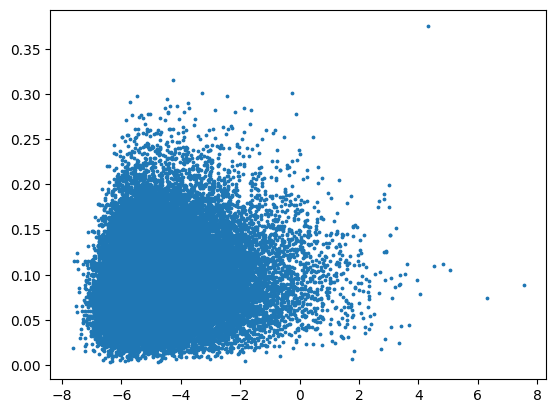

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1], s=3)

In [2]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

2025-04-09 14:23:56.407100: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 784)
(10000, 784)


2025-04-09 14:24:06.244316: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2025-04-09 14:24:08.479650: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3822

2025-04-09 14:24:26.554095: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.3817 - val_loss: 0.1907
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 0.1807 - val_loss: 0.1542
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - loss: 0.1502 - val_loss: 0.1343
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 0.1324 - val_loss: 0.1213
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.1204 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 0.1127 - val_loss: 0.1069
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - loss: 0.1072 - val_loss: 0.1025
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1031 - val_loss: 0.0993
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - loss: 0.1001 - val_loss: 0.0970
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 0.0978 - val_loss: 0.0954
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0965 - val_loss: 0.0944
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 